In [1]:
import pandas as pd

In [2]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense

In [3]:
from tensorflow.keras.models import Model

In [4]:
data = pd.read_excel('data2.xlsx')

In [5]:
data.person = pd.Categorical(data.person)
data['newUserId']= data.person.cat.codes

In [6]:
data.film = pd.Categorical(data.film)
data['newMovieId']= data.film.cat.codes

In [7]:
userids = data.newMovieId.values

In [8]:
movieids = data.newMovieId.values

In [9]:
ratings = data.rate.values

In [10]:
N = len(set(userids))

In [11]:
M = len(set(movieids))

In [12]:
K=10

In [13]:
u = Input(shape = (1,))

In [14]:
m = Input(shape= (1,))

In [15]:
uemb = Embedding(N,K)(u)
memb= Embedding(M,K)(m)

In [16]:
uemb = Flatten()(uemb)
memb = Flatten()(memb)

In [17]:
x = Concatenate()([uemb, memb])

In [18]:
x = Dense(1024, activation = 'relu')(x)
x = Dense(1)(x)

In [19]:
model = Model (inputs = [u,m], outputs = x)

In [20]:
from tensorflow.keras.optimizers import SGD

In [21]:
model.compile(optimizer = SGD(learning_rate= 0.01, momentum=0.9),  loss = 'mse')

In [22]:
from sklearn.utils import shuffle

In [23]:
userids , movieids, ratings = shuffle(userids, movieids, ratings)

In [24]:
Ntrain= int(0.8 * len(ratings))

In [25]:
Ntrain

32

In [26]:
trainMovie = movieids[:Ntrain]

In [27]:
trainuserids= userids[:Ntrain]

In [28]:
trainratings= ratings[:Ntrain]

In [29]:
testuser= userids[Ntrain:]

In [30]:
testmovie= movieids[Ntrain:]

In [31]:
testratings= ratings[Ntrain:]

In [ ]:
avgrating = trainratings.mean()

In [ ]:
trainratings = trainratings -avgrating

In [ ]:
testratings = testratings - avgrating

In [ ]:
batchsize= 600

In [32]:
r = model.fit( x= [trainuserids, trainMovie], y = trainratings, epochs=40, validation_data=([testuser, testmovie], testratings))

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 13.6477 - val_loss: 7.6613
Epoch 2/40
1/1 [==============================] - 0s 45ms/step - loss: 12.9460 - val_loss: 6.6888
Epoch 3/40
1/1 [==============================] - 0s 45ms/step - loss: 11.6791 - val_loss: 5.3919
Epoch 4/40
1/1 [==============================] - 0s 45ms/step - loss: 9.9493 - val_loss: 3.9470
Epoch 5/40
1/1 [==============================] - 0s 45ms/step - loss: 7.9360 - val_loss: 2.5900
Epoch 6/40
1/1 [==============================] - 0s 45ms/step - loss: 5.8883 - val_loss: 1.5642
Epoch 7/40
1/1 [==============================] - 0s 40ms/step - loss: 4.0628 - val_loss: 1.1089
Epoch 8/40
1/1 [==============================] - 0s 45ms/step - loss: 2.7185 - val_loss: 1.4111
Epoch 9/40
1/1 [==============================] - 0s 45ms/step - loss: 2.0802 - val_loss: 2.4883
Epoch 10/40
1/1 [==============================] - 0s 40ms/step - loss: 2.2344 - val_loss: 4.0569
Epoch 11/40
1/1 [===========

In [33]:
import matplotlib.pyplot as plt

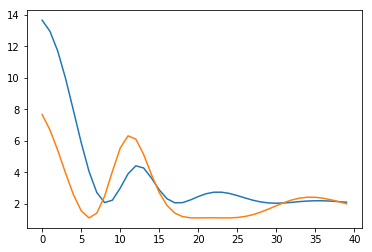

In [34]:
plt.plot(r.history['loss'])

plt.plot(r.history['val_loss'])

In [35]:
yy = model.predict([testuser, testmovie])

1/1 [==============================] - 0s 155ms/step


In [36]:
yy

array([[3.605668 ],
       [3.5858555],
       [3.6658564],
       [3.6134968],
       [3.5858555],
       [3.6658564],
       [3.6380234],
       [3.6658564],
       [3.5858555]], dtype=float32)

In [37]:
testratings

array([2, 4, 5, 2, 2, 2, 2, 3, 2], dtype=int64)

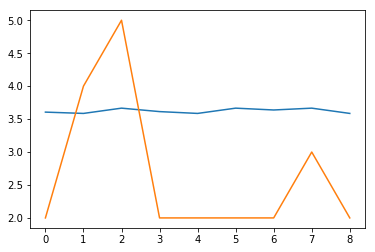

In [39]:
plt.plot(yy)
plt.plot(testratings)